#  Linear regression

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Estudio\redes neuronales\tarea_regresion\tarea-regresion-Neko-xero\ex1data1.txt", sep=",")

print(df.head())

   6.1101   17.592
0  5.5277   9.1302
1  8.5186  13.6620
2  7.0032  11.8540
3  5.8598   6.8233
4  8.3829  11.8860


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt('ex1data1.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y
X=data[:,0]
Y=data[:,1]
print('First 10 examples from the dataset:')
for i in range(10):
    print(f'x = {X[i]:.0f}, y = {Y[i]:.0f}')





[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]
First 10 examples from the dataset:
x = 6, y = 18
x = 6, y = 9
x = 9, y = 14
x = 7, y = 12
x = 6, y = 7
x = 8, y = 12
x = 7, y = 4
x = 9, y = 12
x = 6, y = 7
x = 5, y = 4


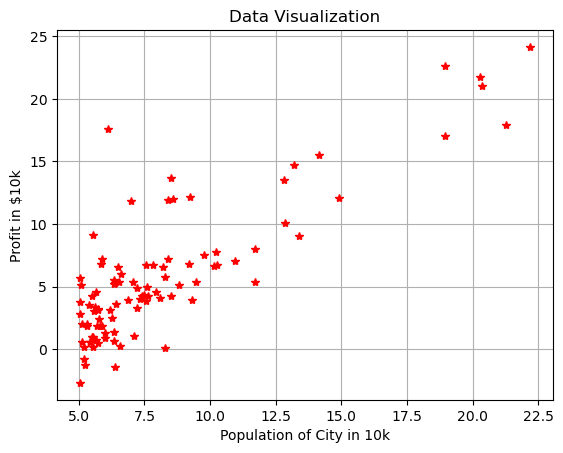

In [8]:
# ==================== Part 1: Plotting ====================


# Plot data
X=data[:,0]
Y=data[:,1]
plt.plot(X, Y, '*r', label='Profit')  # Red stars for positive examples
plt.grid(True)  # Turn on the grid
#plt.legend()    # Add legend
plt.xlabel('Population of City in 10k')  # Label for x-axis
plt.ylabel('Profit in $10k')  # Label for y-axis
plt.title('Data Visualization')  # Add a title
plt.show()

# Cost Function

The objective of linear regression is to minimize the cost function:
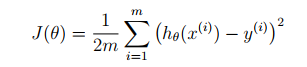

where the hypothesis h is given by

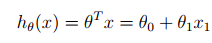

**Create a matrix by adding a column of ones to the vecto X**

You should expect to see a cost of approximately 32.07


In [4]:
# using numpy and scipy
# Sigmoid function
from scipy.optimize import minimize

#Implement cost function
def cost_function(theta, X, y):
    m = len(y)
    h= np.dot(X,theta)
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    J = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return J

m = data.shape[0]
y = data[:, [1]]
X = data[:, [0]]  # Then, create a matrix by adding a column of ones to the vecto X
X = np.hstack([np.ones((m, 1)), X])
theta = np.zeros((2, 1)) # Look that theta is a vector 2x1
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}") #You should expect to see a cost of approximately 32.07


Model parameters: [[0.]
 [0.]]
Cost function: 32.072733877455676


# Gradient descent

Next, you will implement gradient descent in the file gradientDescent.m.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

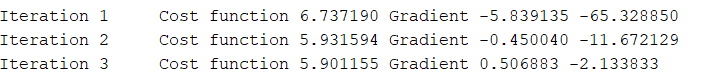



Iteration 2	Cost: 6.737190 Gradient: -5.839135 -65.328850
Iteration 3	Cost: 5.931594 Gradient: -0.450040 -11.672129
Iteration 4	Cost: 5.901155 Gradient:  0.506883 -2.133833
Iteration 5	Cost: 5.895229 Gradient:  0.675930 -0.438169
Iteration 6	Cost: 5.890095 Gradient:  0.704925 -0.136637
Iteration 7	Cost: 5.885004 Gradient:  0.709025 -0.082930
Iteration 8	Cost: 5.879932 Gradient:  0.708701 -0.073277
Iteration 9	Cost: 5.874879 Gradient:  0.707594 -0.071455
Iteration 10	Cost: 5.869844 Gradient:  0.706348 -0.071026
Iteration 11	Cost: 5.864827 Gradient:  0.705080 -0.070845
Iteration 12	Cost: 5.859828 Gradient:  0.703810 -0.070707
Iteration 13	Cost: 5.854847 Gradient:  0.702542 -0.070578
Iteration 14	Cost: 5.849884 Gradient:  0.701275 -0.070451
Iteration 15	Cost: 5.844939 Gradient:  0.700011 -0.070324
Iteration 16	Cost: 5.840011 Gradient:  0.698749 -0.070197
Iteration 17	Cost: 5.835102 Gradient:  0.697490 -0.070070
Iteration 18	Cost: 5.830210 Gradient:  0.696233 -0.069944
Iteration 19	Cost: 5

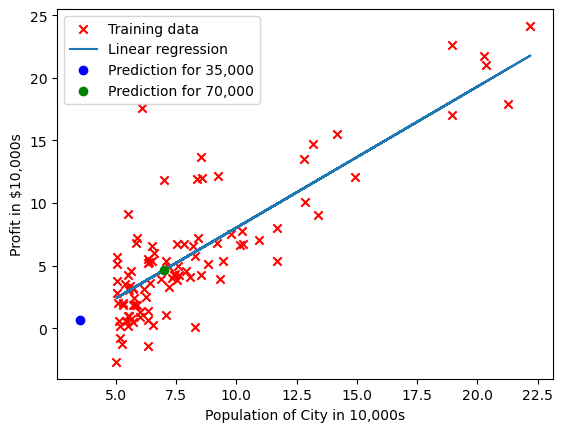

In [5]:
import numpy as np
import matplotlib.pyplot as plt

iterations = 1000
m = data.shape[0]
y = data[:, [1]]
X = data[:, [0]]
X = np.hstack([np.ones((m, 1)), X])
theta = np.zeros((2, 1))
alpha = 0.01
def gradientDescent(X, y, theta, alpha, iterations):
  m = len(y)  # number of training examples
  J_history = np.zeros(iterations)

  for iter in range(1,iterations):

      h = X @ theta

        # Calcular el error
      error = h - y

      gradient = (1 / m) * (X.T @ error)

        # Actualizar theta usando la fórmula del descenso de gradiente
      theta = theta - (alpha / m) * (X.T @ error)

      J_history[iter] = cost_function(theta,X, y)
      print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f} Gradient: {gradient[0,0]: .6f} {gradient[1,0]: .6f}")

  return theta

theta = gradientDescent(X, y, theta, alpha, 1000);
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]) @ theta
print(f'For population = 35,000, we predict a profit of {(predict1 * 10000).item():.2f}')

predict2 = np.array([1, 7.0]) @ theta
print(f'For population = 35,000, we predict a profit of {(predict2 * 10000).item():.2f}')


# Plot the linear fit
plt.scatter(X[:, 1], y, color='red', marker='x', label='Training data')  # X[:,1] is the feature (since X[:,0] is the bias term)
plt.plot(X[:, 1], X @ theta, label='Linear regression')  # X @ theta gives the predicted values
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(3.5, predict1.item(), 'ob', label='Prediction for 35,000')
plt.plot(7.0, predict2.item(), 'og', label='Prediction for 70,000')
plt.legend()
plt.show()

# Visualization

Visualizing J(theta_0, theta_1) ...


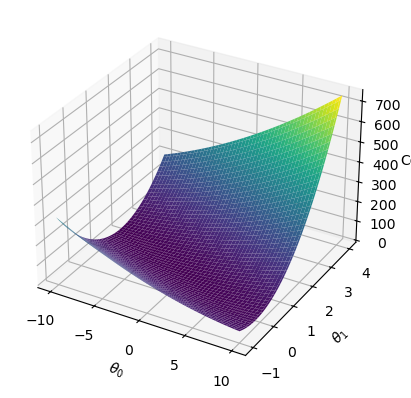

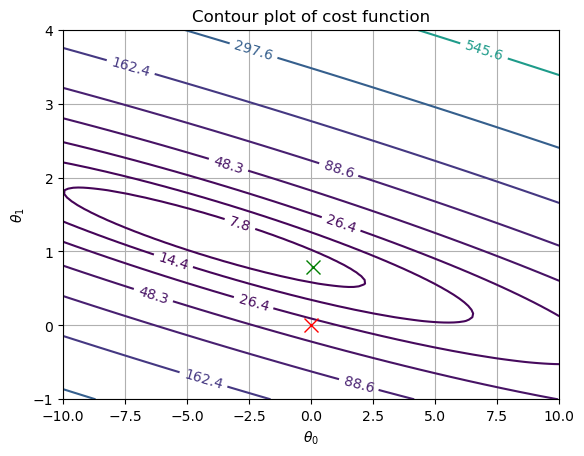

In [14]:
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

print('Visualizing J(theta_0, theta_1) ...')

theta_init = np.zeros((2, 1))
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = cost_function(t, X, y)

# Transpose J_vals to match the orientation of MATLAB's surf
J_vals = J_vals.T

# Surface plot
theta0_vals_mesh, theta1_vals_mesh = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals_mesh, theta1_vals_mesh, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')

# Contour plot
plt.figure()
cp = plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.clabel(cp)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

# Plot the final theta found by gradient descent
plt.plot(theta_init[0, 0], theta_init[1, 0], 'rx', markersize=10, linewidth=2)
plt.plot(theta[0, 0], theta[1, 0], 'gx', markersize=10, linewidth=2)
plt.title('Contour plot of cost function')
plt.grid(True)
plt.show()
